# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

# Описание проекта
Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».  
В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.  
Постройте модель с максимально большим значением accuracy. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте accuracy на тестовой выборке самостоятельно.

# Описание данных
Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:
сalls — количество звонков,
minutes — суммарная длительность звонков в минутах,
messages — количество sms-сообщений,
mb_used — израсходованный интернет-трафик в Мб,
is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

## Изучение файла

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier

from joblib import dump, load



In [2]:
df = pd.read_csv('/datasets/users_behavior.csv')
df

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


In [3]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


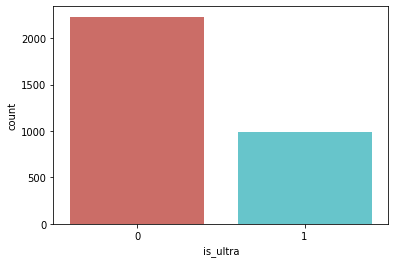

Тариф не "ultra" 0.693528313627878
Тариф "ultra" 0.30647168637212197


In [4]:
sns.countplot(x='is_ultra',data=df,palette='hls')
plt.show();
print('Тариф не "ultra"',(df['is_ultra'] == 0).sum()/len(df))
print('Тариф "ultra"',(df['is_ultra'] == 1).sum()/len(df))

В 69,4% пользователи используют тариф Смарт,и в 30,6% используют тариф Ультра. 

## Разбейте данные на выборки

In [5]:
features = df.drop(['is_ultra'],axis=1)
target = df['is_ultra']

In [6]:
features_train,features_test_valid,target_train,target_test_valid = train_test_split(features,target,test_size=0.4,random_state=12345,stratify=target)
features_test,features_valid,target_test,target_valid = train_test_split(features_test_valid,target_test_valid,test_size = 0.5,random_state = 12345,stratify=target_test_valid)

In [8]:
features_train.shape

(1928, 4)

In [9]:
features_valid.shape

(643, 4)

In [10]:
features_test.shape

(643, 4)

## Исследуйте модели

Лучшая модель: DecisionTreeClassifier(max_depth=5, random_state=12345)
Accuracy лучшей  модели на валидационной выборке: 0.8118195956454122
Accuracy лучшей модели на обучающей выборке: 0.8874481327800829


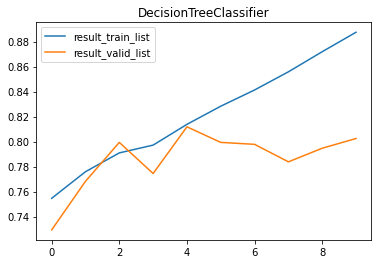

In [11]:
result_train_list = []
result_valid_list = []
best_result = 0
best_model = None
for depth in range(1,11): #оставлю максимальную глубину деревьев до 10,чтобы видеть график
    model = DecisionTreeClassifier(random_state = 12345,max_depth = depth)
    model.fit(features_train,target_train)
    predictions_valid = model.predict(features_valid)
    predictions_train = model.predict(features_train)
    result = accuracy_score(target_valid,predictions_valid)
    result_train = accuracy_score(target_train,predictions_train)
    result_train_list.append(result_train)
    result_valid_list.append(result)
    if result > best_result:
        best_model = model
        best_result = result
    
        
plt.plot(result_train_list)
plt.plot(result_valid_list)
plt.legend(['result_train_list','result_valid_list'])
plt.title('DecisionTreeClassifier')

print('Лучшая модель:',best_model)

print('Accuracy лучшей  модели на валидационной выборке:',best_result)
print('Accuracy лучшей модели на обучающей выборке:',result_train)
        

Лучшая модель: DecisionTreeClassifier(max_depth=5, random_state=12345)
Accuracy лучшей  модели на валидационной выборке: 0.8118195956454122
Accuracy лучшей модели на обучающей выборке: 0.8137966804979253
При параметре max_depth=5,модель хорошо обучена.

In [12]:
model = DecisionTreeClassifier(random_state = 12345)
model.fit(features_train,target_train)
predictions_valid = model.predict(features_valid)
predictions_train = model.predict(features_train)
result = accuracy_score(target_valid,predictions_valid)
result_train = accuracy_score(target_train,predictions_train)

print(result_train)
print(result)

1.0
0.7247278382581649


Модель по умолчанию находится около max_depth = 20,если изменить параметры в цикле,можно увидеть что если max_depth >20,то график пойдет параллельно друг другу со значениями равными по умолчанию

Accuracy лучшей  модели на валидационной выборке: 0.8149300155520995
Accuracy лучшей модели на обучающей выборке: 0.8241701244813278
Лучшая модель: RandomForestClassifier(max_depth=6, n_estimators=3, random_state=12345)


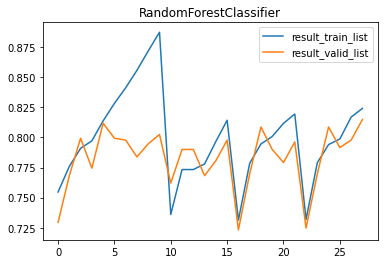

In [13]:
best_result = 0
best_model = None
for est in range(1,4):
    for depth in range (1,7):
        model = RandomForestClassifier(random_state = 12345,n_estimators=est,max_depth = depth)
        model.fit(features_train,target_train)
        result = model.score(features_valid,target_valid)
        result_train = model.score(features_train,target_train)
        result_valid_list.append(result)
        result_train_list.append(result_train)
        if result > best_result:
            best_model = model
            best_result = result
            
           

plt.plot(result_train_list)
plt.plot(result_valid_list)
plt.legend(['result_train_list','result_valid_list'])
plt.title('RandomForestClassifier')
print('Accuracy лучшей  модели на валидационной выборке:',best_result)
print('Accuracy лучшей модели на обучающей выборке:',result_train)
print('Лучшая модель:',best_model)

Можно заметить что график в "Случайном лесе" не расходится так как "Дерево решений"
Accuracy лучшей  модели на валидационной выборке: 0.8149300155520995
Accuracy лучшей модели на обучающей выборке: 0.8241701244813278
Лучшая модель: RandomForestClassifier(max_depth=6, n_estimators=3, random_state=12345)

In [14]:
model = RandomForestClassifier(random_state = 12345,n_estimators=10,max_depth = 7,min_samples_leaf=2,min_samples_split=8)
model.fit(features_train,target_train)
result = model.score(features_valid,target_valid)
result_train = model.score(features_train,target_train)
dump(best_model, 'filename.joblib') 
print(result)
print(result_train)

0.8180404354587869
0.8397302904564315


<div class="alert alert-info">
<font size="5"><b>Комментарий студента</b></font>
    
<font > Попробовала GridSearch,не поняла как выбирают параметры и шаги,подскажи пожалуйста)
    Результат лучше чем, с подбором по двум параметрам,думаю можно еще лучше,но мой ноут этого не выдержит)
    Разница между валидационной и обучающей около 2%,это немного?</b></font>

In [15]:
model = LogisticRegression(penalty='l1',random_state = 12345,solver='liblinear',max_iter = 1000)
model.fit(features_train,target_train)
predict = model.predict(features_valid)
model.score(features_valid,target_valid)
print('Доля правильных ответов на валидационной выборке:',model.score(features_valid,target_valid))
print('Доля правильных ответов на обучающей выборке:',model.score(features_train,target_train))

Доля правильных ответов на валидационной выборке: 0.7465007776049767
Доля правильных ответов на обучающей выборке: 0.75


## Проверьте модель на тестовой выборке

In [16]:
best_model = load('filename.joblib') 
result = best_model.score(features_test,target_test)
print(result)

0.7947122861586314


На тестовой выборке модель "Случайный Лес" показывает результат - 0.7947122861586314, на валидационной выборке - 0.8180404354587869.

In [17]:
new_features = pd.concat([features_train,features_valid],ignore_index=True)
new_target = pd.concat([target_train,target_valid],ignore_index=True)
new_features.shape

(2571, 4)

In [18]:
new_features.head()


,calls,minutes,messages,mb_used
0,76.0,484.49,11.0,22454.35
1,51.0,328.88,24.0,20511.93
2,105.0,705.05,18.0,22130.74
3,19.0,135.52,48.0,13152.50
4,28.0,159.55,0.0,14780.00


In [19]:
model = RandomForestClassifier(random_state = 12345,n_estimators=10,max_depth = 7,min_samples_leaf=2,min_samples_split=8)
model.fit(new_features,new_target)
result = model.score(features_test,target_test)
result_train = model.score(new_features,new_target)
print('Результат на тестовой выборке,модель обучена на тренировочной + валидационной выборке',result)
print('Результат на  новой тренировочной выборке,которая состоит из тренировочной + валидационной выборке',result_train)

Результат на тестовой выборке,модель обучена на тренировочной + валидационной выборке 0.8289269051321928
Результат на  новой тренировочной выборке,которая состоит из тренировочной + валидационной выборке 0.838584208479191


## (бонус) Проверьте модели на адекватность

In [20]:
strategies = ['most_frequent', 'stratified', 'uniform', 'constant']

  

test_scores = []

for s in strategies:

    if s =='constant':

        dclf = DummyClassifier(strategy = s, random_state = 12345, constant =1)

    else:

        dclf = DummyClassifier(strategy = s, random_state = 12345)

    dclf.fit(features_train, target_train)

    score = dclf.score(features_valid, target_valid)

    test_scores.append(score)
print(test_scores)

[0.6936236391912908, 0.5567651632970451, 0.49455676516329705, 0.30637636080870917]


При использовании классификатора со стратегией "самое частое",получаем результат доля правильных ответов 69,36%. Самый частый ответ будет "0".
При использовании константы = 1,получаем долю правильных ответов 30,64%.
При стратегии выставления ответов равномерно наугад ,доля правильных ответов 49,5%.
При стратифицированный стратегии ,доля правильных ответов 55,7%.
Исходя из этого, можно сделать вывод, что выбранная нами модель дает результат лучше, чем случайный классификатор или ,если по умолчанию поставить самое частое значение.

## Общий вывод

При проведение данной работы использовались модели обучения "Дерево решений","Случайный лес" и "Логистическая регрессия".
Лучший результат показала модель "Случайный лес",с результатом 0.8180404354587869,на валидационой выборке,0.7947122861586314 на тестовой выборке.
После этого модель дообучили на выборке тренировочная + валидационной,результат на тестовой выборке улучшился до 0.8289269051321928.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
